# Assignment 5

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [1]:
import pandas as pd
import requests
import requests_cache
requests_cache.install_cache('cache')

import lxml.html as lx

from bs4 import BeautifulSoup

In [9]:
def articles_scrape(url, page = 1):
    """
    Retur a list of artile URLs.
    Args:
    url(string): URL of the article list.
    page(int): the number of pages to fetch links from(defult=1)"""
    base = url
    if page == 1:
        response = requests.get(base)
    else:
        response = requests.get(base + 'page/' + str(page) + '/')
    soup = BeautifulSoup(response.content, 'html.parser')
    return [link.a.get('href') for link in soup.find_all('h2')]

In [12]:
test_urls = articles_scrape('https://theaggie.org/campus/', page = 1)
test_urls

[u'https://theaggie.org/2017/02/20/uc-releases-2016-annual-report-on-sustainable-practices/',
 u'https://theaggie.org/2017/02/19/uc-davis-global-affairs-holds-discussion-on-president-donald-trumps-executive-orders-on-immigration/',
 u'https://theaggie.org/2017/02/19/trumps-immigration-ban-affects-uc-davis-community/',
 u'https://theaggie.org/2017/02/17/uc-davis-students-participate-in-uc-wide-nodapl-day-of-action/',
 u'https://theaggie.org/2017/02/17/uc-davis-holds-first-mental-health-conference/',
 u'https://theaggie.org/2017/02/16/last-week-in-senate-6/',
 u'https://theaggie.org/2017/02/16/2017-asucd-winter-elections-meet-the-candidates/',
 u'https://theaggie.org/2017/02/14/shields-library-hosts-new-exhibit-for-davis-centennial/',
 u'https://theaggie.org/2017/02/14/student-health-and-counseling-services-hosts-step-up-to-the-plate-campaign/',
 u'https://theaggie.org/2017/02/13/pe-classes-may-charge-additional-fees/',
 u'https://theaggie.org/2017/02/12/11-new-chancellor-fellows-honored

<strong>Acturally, the information scripted from the first page of campus news is wrong , which is not updated news as shown in the website and leads to repeated information from other pages, and I didn't realise it untill I did the exercise 1.4. The other pages work well. I hope I could do something to fix it but I have no idea what's going on. </strong>

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

*   Python 2 displays some Unicode characters as `\uXXXX`. For instance, `\u201c` is a left-facing quotation mark.
    You can convert most of these to ASCII characters with the method call (on a string)
    ```
    .translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    ```
    If you're curious about these characters, you can look them up on [this page](http://unicode.org/cldr/utility/character.jsp), or read 
    more about [what Unicode is](http://unicode.org/standard/WhatIsUnicode.html).

In [4]:
def articles_content(url):
    """
    Return the url, title, text and author of an article.
    """
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    title = soup.title.string.encode('ascii', 'ignore').split(' |')[0]
    text = str()
    author = str()
    par = soup.find_all('p')
    for p in par:
        line = p.text.strip().encode('ascii', 'ignore')
        if line.find('Written by:') == -1:
            text += line
        else:
            pos = line.find('Written by:')
            end = line.find('  ')
            author = line[pos+12:end]
            line = line[:pos]
            text += line
            break
    content = {'url':url, 'title':title, 'text':text.strip(),'author':author }
    return content

In [5]:
test_url = test_urls[5]
test_content = articles_content(test_url)
test_content

{'author': 'Demi Caceres',
 'text': 'Last week in SenateThe ASUCD Senate meeting was called to order by Vice President Abhay Sandhu on Feb. 2 at 6:12 p.m. Eight of the 11 senators were present, with President Alex Lee and Senators Julie Jung and Sofia Molodanof marked absent.The meeting began with a presentation by Gallo Wineries. The company announced that it is looking to recruit students and graduates for its management sales positions to help lead the company. Company representatives will attend the Career Fair on March 1 to meet with any interested students.The meeting then motioned into appointments and confirmations, where Sexual Assault Awareness & Advocacy Committee (SAAC) chair Rachelle Fishbin introduced the new SAAC commissioners. After a series of questions, Senator Irveen Grewal moved to confirm the three SAAC commissioners. The motion was seconded and there were no objections.After confirmation of members, the Senate discussed consideration of old legislation. Senate Bil

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [6]:
url1 = 'https://theaggie.org/campus/'
url2 = 'https://theaggie.org/city/'

df1 = pd.DataFrame()
df2 = pd.DataFrame()
for i in range(4):
    urls1 = articles_scrape(url1, page = i+1)
    urls2 = articles_scrape(url2, page = i+1)
    df_new1 = pd.DataFrame([articles_content(url) for url in urls1])
    df_new2 = pd.DataFrame([articles_content(url) for url in urls2])
    df1 = pd.concat([df1, df_new1])
    df2 = pd.concat([df2, df_new2])

In [177]:
df1['category'] = 'campus_news'
df2['category'] = 'city_news'
df = pd.concat([df1, df2])
df = df.reset_index(drop=True)
df.head()

,author,text,title,url,category
0,Yvonne Leong,UC Davis leads in sustainability with largest ...,UC releases 2016 Annual Report on Sustainable ...,https://theaggie.org/2017/02/20/uc-releases-20...,campus_news
1,Kenton Goldsby,"Speakers, including Interim Chancellor Ralph J...",UC Davis Global Affairs holds discussion on Pr...,https://theaggie.org/2017/02/19/uc-davis-globa...,campus_news
2,Kimia Akbari,Executive order has immediate consequences for...,Trumps immigration ban affects UC Davis community,https://theaggie.org/2017/02/19/trumps-immigra...,campus_news
3,Kaitlyn Cheung,Student protesters march from MU flagpole to M...,UC Davis students participate in UC-wide #NoDA...,https://theaggie.org/2017/02/17/uc-davis-stude...,campus_news
4,Jayashri Padmanabhan,"Conference entails full day of speakers, panel...",UC Davis holds first mental health conference,https://theaggie.org/2017/02/17/uc-davis-holds...,campus_news


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [8]:
import numpy as np
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [9]:
# Tokenize and Lemmatize
tokenize = nltk.word_tokenize

def stem(tokens,stemmer = PorterStemmer().stem):
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """
    return stem(tokenize(text))

In [22]:
text = [t for t in df['text']]

In [11]:
textd = {} # dictionary from lemmata to document ids containing that lemma
for t, index in zip(text, range(len(df))):
    s = set(lemmatize(t))
    try:
        toks = toks | s
    except NameError:
        toks = s
    for tok in s:
        try:
            textd[tok].append(index)
        except KeyError:
            textd[tok] = [index]

In [12]:
# Analyse all the titles to find most common topics
textd_t = {} # dictionary from lemmata to document ids containing that lemma
for text, index in zip(df['title'], range(len(df))):
    s = set(lemmatize(text))
    for tok in s:
        try:
            textd_t[tok].append(index)
        except KeyError:
            textd_t[tok] = [index]

In [13]:
tokids = {} # dictionary of lemma to integer id for the lemma
tok_list = list(toks)
m = len(tok_list)
for j in xrange(m):
    tokids[tok_list[j]] = j

To find the topics that Aggie covers most, we can calculate the smoothed idfs of both titles and texts.

In [14]:
# Compute smoothed idf
logN = np.log(len(df))
n_d_text = {key:len(set(val)) for key,val in textd.items()}
n_d_title = {key:len(set(val)) for key,val in textd_t.items()}
idf_smooth_text = {key:logN - np.log(1 + val) for key, val in n_d_text.items() if val > 1}
idf_smooth_title = {key:logN - np.log(1 + val) for key, val in n_d_title.items() if val > 1}

In [15]:
# The first 30 frequent tokens in texts and titles
for w, t in zip(sorted(idf_smooth_text, key=idf_smooth_text.get, reverse=True), sorted(idf_smooth_title, key=idf_smooth_title.get, reverse=True))[:30]:
    print w, '    ', t

1,800      help
climb      approv
oldest      children
saylor      transport
voter      islam
up-and-com      former
compassion      bike
blanket      2017
years.th      hall
jack      plate
unitran      candid
jacob      centenni
appar      sexcess
emili      bank
sexcess      michael
vast      leader
later.th      erupt
showcas      respond
miller      mental
gorman      donald
reconsider.id      out
uc.im      napolitano
net      uc-wid
disney      be
mee      confer
intellectu      news
sigala      come
shemeri      addit
luther      launch
militari      shield


In [37]:
# Form a idf weighted similarity by using the built in TfidfVectorizer method from scikit-learn 
# - TfidfVectorizer: convert a collection of raw documents to a matrix of TF-IDF features.
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm=None)
tfs = vectorizer.fit_transform(text)

(array([  5.00000000e+00,   3.00000000e+00,   1.00000000e+01,
          8.00000000e+00,   1.60000000e+01,   2.60000000e+01,
          3.80000000e+01,   5.00000000e+01,   6.40000000e+01,
          9.60000000e+01,   1.27000000e+02,   9.00000000e+01,
          1.61000000e+02,   2.64000000e+02,   1.81000000e+02,
          2.35000000e+02,   3.94000000e+02,   0.00000000e+00,
          1.00800000e+03,   3.48100000e+03]),
 array([ 1.        ,  1.20513217,  1.41026434,  1.6153965 ,  1.82052867,
         2.02566084,  2.23079301,  2.43592518,  2.64105735,  2.84618951,
         3.05132168,  3.25645385,  3.46158602,  3.66671819,  3.87185036,
         4.07698252,  4.28211469,  4.48724686,  4.69237903,  4.8975112 ,
         5.10264337]),
 <a list of 20 Patch objects>)

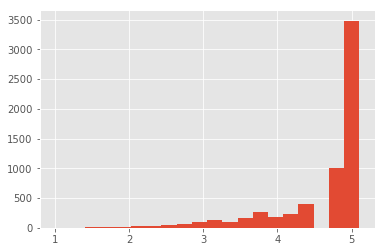

In [24]:
# Obtain idfs and plot histogram
idfs = vectorizer.idf_
idf_smooth = {key:val for key, val in zip(vectorizer.get_feature_names(), idfs)}
plt.hist(idfs, bins=20)

In [178]:
# The first 50 frequent words
for w in sorted(idf_smooth, key = idf_smooth.get, reverse = True)[:30]:
    print w

enforcement.th
yellow
interchang
france.stud
45.3
delv
disturb
prize
wednesday
multipurpos
me.hartwel
charter
7,156
competition.marcom
courses.prepar
talk.w
succumb
2017.student
herb
herd
lgbt
dorm
unseemli
bamforth
k
reddit.written
golden
lighting.sinc
233,000
drawer.mani


In [30]:
# Similarity matrix
sim = tfs.dot(tfs.T)

In [176]:
from wordcloud import WordCloud

In [174]:
longstring1 = str()
for t in df1['text']:
    longstring1 += t
    
longstring2 = str()
for t in df2['text']:
    longstring2 += t

(-0.5, 399.5, 199.5, -0.5)

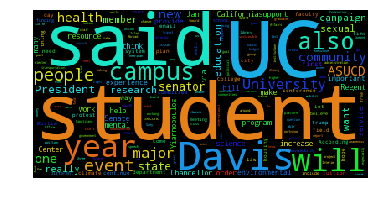

In [173]:
wordcloud = WordCloud().generate(longstring1)
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

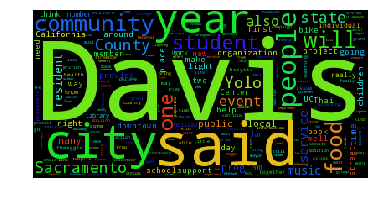

In [175]:
wordcloud = WordCloud().generate(longstring2)
plt.imshow(wordcloud)
plt.axis("off")

In [50]:
nbrs = NearestNeighbors(n_neighbors=2).fit(tfs)
distances, indices = nbrs.kneighbors(tfs)

In [181]:
ind = pd.DataFrame(indices)
dist = pd.DataFrame(distances)[1]
pairs = pd.concat([ind, dist], axis=1)
pairs.columns = ['art1','art2', 'distance']
pairs = pairs.sort_values(by = 'distance')
pairs = pairs.drop_duplicates()
# Find 3 pairs of most similar articles
pairs[pairs['distance']!=0.0].head()

,art1,art2,distance
111,111,116,37.724332
116,116,111,37.724332
82,82,116,39.577645
107,107,116,40.381673
69,69,116,41.277907


In [186]:
print df.iloc[111,:]
print df.iloc[116,:]
print df.iloc[82,:]
print df.iloc[107,:]

author                                                       
text        Nov. 7Subject stated our pizza is ready and th...
title                                             Police Logs
url            https://theaggie.org/2016/11/22/police-logs-4/
category                                            city_news
Name: 111, dtype: object
author                                                       
text        More turkeys, more tomfoolery, more accidental...
title                                             Police Logs
url            https://theaggie.org/2016/11/15/police-logs-3/
category                                            city_news
Name: 116, dtype: object
author                           Sam Solomon city@theaggie.or
text        Slim Jims and beer cansJan. 15Son is making ho...
title                                             Police Logs
url            https://theaggie.org/2017/01/26/police-logs-9/
category                                            city_news
Name: 82, dtype: obj

In [207]:
def find_common(doc_id_1, doc_id_2):
    """Return common lemmas in a pair of similar articals."""
    common = []
    for t,d in textd.items():
        for n_d in [doc_id_1, doc_id_2]:
            if n_d in d:
                common.append(t)
    return common

In [210]:
com1 = find_common(111,116)
com2 = find_common(82,116)
com3 = find_common(107,116)

## Conclusion
1. Political and transportation topics, such as Donald Trump, candidates, Islam, and bike, are popular among article titles.  
2. Comparing wordclouds of campus news and city news, we find that campus news talks more about student stuff and campus event, city news cares more about community and county stuff.  
3. The 3 pairs of most similar articals are all police logs. They have common subjects such as accident report hence are inclined to make up sentences in similar way.
4. I don't think this corpus can be representative of the Aggie since all the articles in this corpus are posted in recent 2 months and focus on what happened in this period. We might conclude that during these two months, the Aggie put some attention to the impact of post-election on campus and students.